In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import torch
from torch.utils.data import Dataset, DataLoader
import os
import pandas as pd
import librosa
import random

torch.manual_seed(0)
random.seed(0)
np.random.seed(0)

In [ ]:

working_folder_path = ""

In [ ]:
raw_data = pd.DataFrame(columns = ["chars", "audio", "param"])
dirlist = os.listdir(working_folder_path+"raw")
random_choices = np.random.choice(dirlist, size=11217, replace=False)
for idx in range(11217):
    directory = working_folder_path + "raw/" + random_choices[idx]
    record = np.load(directory)
    record.allow_pickle = True
    raw_data = raw_data.append({"chars": record.get("chars"), "audio": record.get("audio"), "param": record.get("param")}, ignore_index=True)
raw_data.to_pickle(working_folder_path+"Res/df_All_sp_random.pkl")

In [ ]:
display(raw_data)

,chars,audio,param
0,"[[0.0, 0.0, 1.0], [0.0, 0.0, 1.0], [0.0, 0.0, ...","[-0.001064, 0.01423, 0.002949, -0.001461, 0.00...","{'Chrs1: Wet': 1.0, 'HPF: FreqModSrc': 0.0, 'E..."
1,"[[0.0, 0.0, 1.0], [1.0, 0.0, 0.0], [1.0, 0.0, ...","[-1.764e-05, 0.0002363, 4.95e-05, -2.456e-05, ...","{'Chrs1: Wet': 1.0, 'HPF: FreqModSrc': 0.0, 'E..."
2,"[[0.0, 0.0, 1.0], [0.0, 0.0, 1.0], [0.0, 0.0, ...","[0.0002646, -0.003479, -0.0007234, 0.0003562, ...","{'Chrs1: Wet': 1.0, 'HPF: FreqModSrc': 0.0, 'E..."
3,"[[0.0, 0.0, 1.0], [0.0, 0.0, 1.0], [0.0, 1.0, ...","[-0.0002673, 0.003696, 0.0008445, 3.01e-05, 0....","{'Chrs1: Wet': 1.0, 'HPF: FreqModSrc': 0.0, 'E..."
4,"[[0.0, 0.0, 1.0], [0.0, 0.0, 1.0], [0.0, 0.0, ...","[-0.000429, 0.005707, 0.001185, -0.0005865, 0....","{'Chrs1: Wet': 1.0, 'HPF: FreqModSrc': 0.0, 'E..."
...,...,...,...
11212,"[[0.0, 0.0, 1.0], [0.0, 0.0, 1.0], [0.0, 0.0, ...","[0.000525, -0.007233, -0.001715, 0.000626, -0....","{'Chrs1: Wet': 0.7140000000000001, 'HPF: FreqM..."
11213,"[[1.0, 0.0, 0.0], [0.0, 0.0, 1.0], [0.0, 0.0, ...","[5.823e-05, -0.001474, -0.0003765, 0.0002148, ...","{'Chrs1: Wet': 1.0, 'HPF: FreqModSrc': 0.0, 'E..."
11214,"[[0.0, 0.0, 1.0], [0.0, 0.0, 1.0], [0.0, 0.0, ...","[0.001548, -0.000559, 0.0002031, -0.0001493, 8...","{'Chrs1: Wet': 0.8427, 'HPF: FreqModSrc': 0.0,..."
11215,"[[0.0, 0.0, 1.0], [0.0, 0.0, 1.0], [0.0, 0.0, ...","[0.001167, -0.015396, -0.00325, 0.0016, -0.001...","{'Chrs1: Wet': 0.685, 'HPF: FreqModSrc': 0.0, ..."


In [ ]:
# training set preperation
raw_data = pd.read_pickle(working_folder_path + "Res/df_All_sp_random.pkl")
param_32_keys = open(working_folder_path + "Res/32contparams.txt", 'r').read().splitlines()


In [ ]:
sr = 22050
hop_length = 1024
fft_size = 2048
n_mels = 128


def get_dict_vals_from_keys(dictionary, keys):
    vals = []
    dict_seq = []
    for key in keys:
        dict_seq.append(key)
        vals.append(dictionary[key])
    return vals, dict_seq
audio = raw_data["audio"][5001]
param = raw_data["param"][5001].all()


mel_spectrogram = librosa.feature.melspectrogram(y=audio, sr=sr, n_fft=fft_size, hop_length=hop_length, n_mels=n_mels)
mel_spectrogram_dB = librosa.power_to_db(mel_spectrogram, ref=np.max)
print(mel_spectrogram.shape)

plt.imshow(mel_spectrogram_dB)
vals, dict_seq = get_dict_vals_from_keys(param, param_32_keys)
print(dict_seq)

In [ ]:
image_list = np.zeros([raw_data["audio"].size, 1, 128, 87])
param_list_32 = np.zeros([raw_data["audio"].size, 32])

for i in range(raw_data["audio"].size):
    audio = raw_data["audio"][i]
    param = raw_data["param"][i].all()

    mel_spectrogram = librosa.feature.melspectrogram(y=audio, sr=sr, n_fft=fft_size, hop_length=hop_length, n_mels=n_mels)
    mel_spectrogram_dB = librosa.power_to_db(mel_spectrogram, ref=np.max)
    image_list[i, 0, :, :] = mel_spectrogram_dB
    param_list_32[i, :] = get_dict_vals_from_keys(param, param_32_keys)

np.save(working_folder_path + "Res/image_list_128_87.npy", image_list)
# np.save(working_folder_path + "Res/param_list_32.npy", param_list_32)

In [ ]:
class Mel_dataset(Dataset):
    def __init__(self, inputs, targets):
        self.inputs = inputs
        self.targets = targets

    def __len__(self):
        return len(self.inputs)

    def __getitem__(self, idx):
        input_sample = self.inputs[idx]
        target_sample = self.targets[idx]
        return input_sample, target_sample

In [ ]:
image_list = np.load(working_folder_path + "Res/image_list.npy")
param_list_32 = np.load(working_folder_path + "Res/param_list_32.npy")
# normalisation for resnet input
image_list = (image_list + 80)/80

In [ ]:
plt.imshow(image_list[5000, 0, :, :])

In [ ]:
# Create the dataset for train, val, and test set
mel_dataset = Mel_dataset(image_list, param_list_32)

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split

# Set a fixed random seed
random_seed = 0

# Calculate the length of the dataset and create a list of indices
n_samples = len(mel_dataset)
indices = list(range(n_samples))

# Split the indices into training and test sets
train_indices, test_indices = train_test_split(indices, test_size=0.15, random_state=random_seed)

# Save the train and test indices to a file
np.save(working_folder_path+'Res/train_indices.npy', train_indices)
np.save(working_folder_path+'Res/test_indices.npy', test_indices)

In [ ]:
import numpy as np
from torch.utils.data import Subset

# Instantiate your dataset
dataset = Mel_dataset(image_list, param_list_32)

# Load the train and test indices from the files
train_indices = np.load(working_folder_path+'Res/train_indices.npy')
test_indices = np.load(working_folder_path+'Res/test_indices.npy')

# Create the training and test subsets using the loaded indices
train_set = Subset(dataset, train_indices)
test_set = Subset(dataset, test_indices)

In [ ]:
test_indices[500]

5001

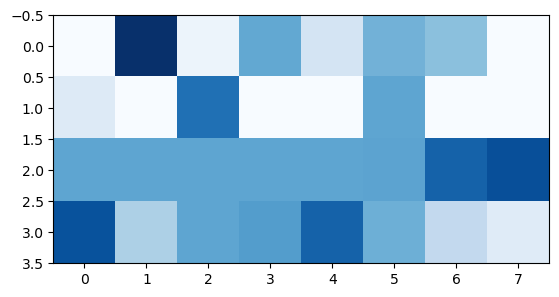

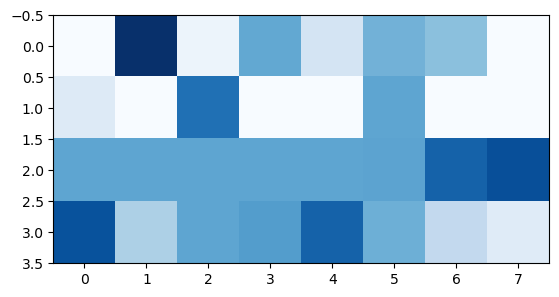

In [ ]:
mel_img, label = dataset.__getitem__(5001)
label = label.reshape(4, 8)
plt.figure(1)
plt.imshow(label, cmap='Blues')

mel_img, label = test_set.__getitem__(500)
label = label.reshape(4, 8)
plt.figure(2)
plt.imshow(label, cmap='Blues')